<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-test Split and Cross-Validation Lab


## Review of train/test validation methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can the training and testing validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston housing data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data
* Train each of your models on the training data
* Evaluate each of the models on the test data
* Rank the models by how well they score on the testing data set.

**Then try K-Fold cross-validation:**
* Perform a k-fold cross validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different K-splits of the data for the same models.

If you're interested, try a variety of response variables.  We start with **MEDV** (the `.target` attribute from the dataset load method).

In [12]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

In [18]:
# A:
#print(boston.DESCR)
#Below you have made all 13 numeric columns the features
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['MEDV'])
boston = pd.concat([y, X], axis=1)

### 1. Clean up any data problems

Load the Boston housing data.  Fix any problems, if applicable.

In [19]:
# A:
boston.isnull().sum()
#boston.dtypes

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

### 2. Select 3-4 variables with your dataset to perform a 50/50 test train split on

- Use sklearn.
- Score and plot your predictions.

In [28]:
# A: CRIM, NOX and LSTAT are my variables, MEDV is my target
#Resetting columns and assigning to new variable
cols = ['MEDV','CRIM', 'NOX', 'LSTAT']
boston_samples = boston[cols]
boston_samples.head(10)

,MEDV,CRIM,NOX,LSTAT
0,24.0,0.00632,0.538,4.98
1,21.6,0.02731,0.469,9.14
2,34.7,0.02729,0.469,4.03
3,33.4,0.03237,0.458,2.94
4,36.2,0.06905,0.458,5.33
5,28.7,0.02985,0.458,5.21
6,22.9,0.08829,0.524,12.43
7,27.1,0.14455,0.524,19.15
8,16.5,0.21124,0.524,29.93
9,18.9,0.17004,0.524,17.10


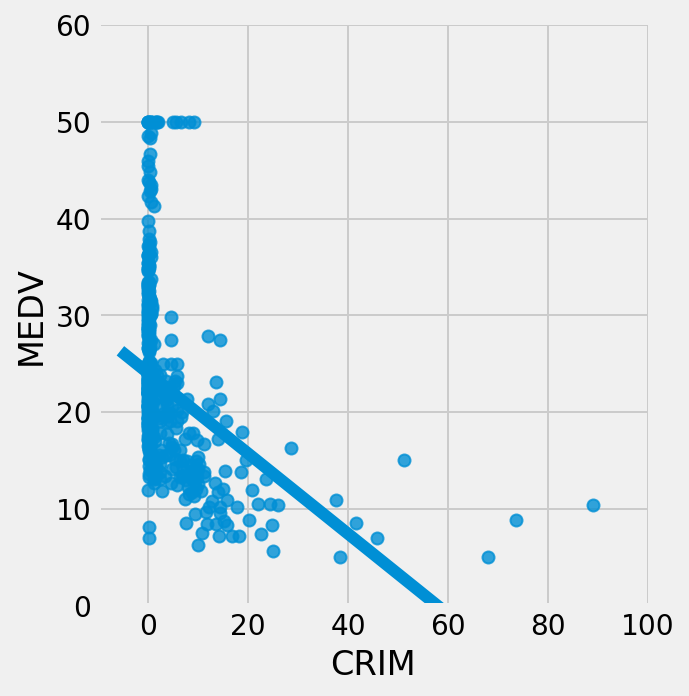

In [34]:
#fit_reg will fit a line by default
sns.lmplot(x='CRIM', y='MEDV', data=boston_samples, ci=None, fit_reg=True);
plt.xlim(-10, 100);
plt.ylim(0, 60);

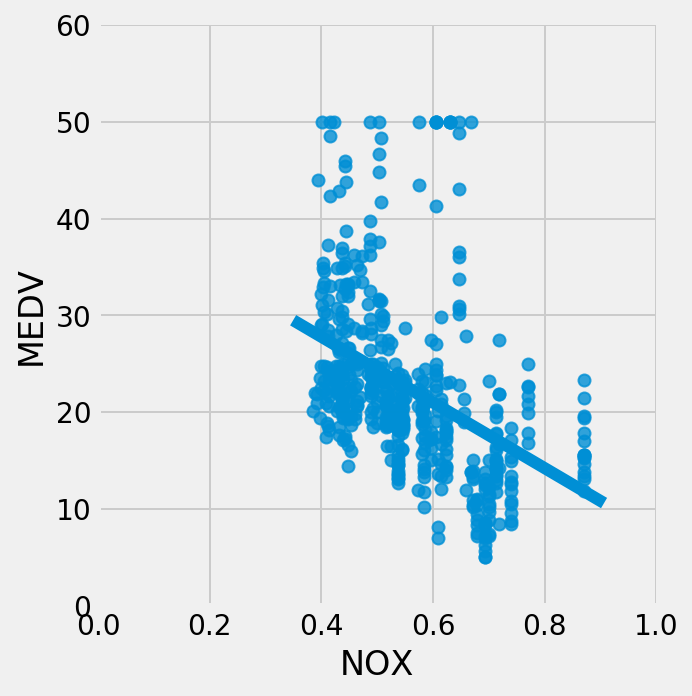

In [38]:
#fit_reg will fit a line by default
sns.lmplot(x='NOX', y='MEDV', data=boston_samples, ci=None, fit_reg=True);
plt.xlim(0, 1);
plt.ylim(0, 60);

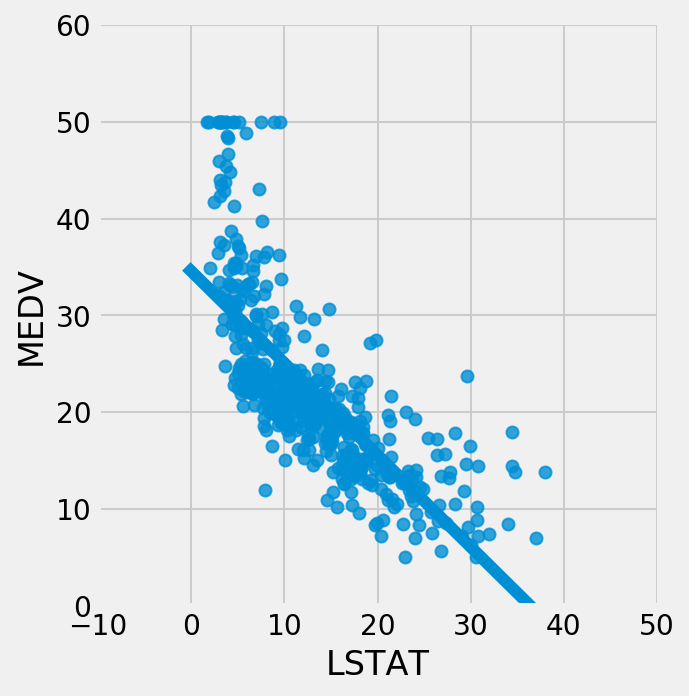

In [40]:
#fit_reg will fit a line by default
sns.lmplot(x='LSTAT', y='MEDV', data=boston_samples, ci=None, fit_reg=True);
plt.xlim(-10, 50);
plt.ylim(0, 60);

### 3. Try 70/30 and 90/10
- Score and plot.  
- How do your metrics change?

In [6]:
# A:

### 4. Try K-Folds cross-validation with K between 5-10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What the variance of scores like?
- Try different folds to get a sense of how this impacts your score.

In [7]:
# A:

### 5. [Bonus] optimize the $R^2$ score

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or K-Folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of K-folds is up to you.

> *Hint:* the `itertools` package is useful for combinations and permutations.


In [8]:
# A:

### 5.1 Can you explain what could be wrong with this approach?

In [9]:
# A:

### 6. [Bonus] Explore another target variable and practice `patsy` formulas

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this dataset?

**Try out using patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and pearson scores.*

In [10]:
import patsy

# A: